In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from category_encoders import BinaryEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# **Exercise: Missing Values & Outliers**

Pada latihan kali ini, kita akan menggunakan beberapa metode yang telah kita pelajari:

- Handling outliers
- Imputing missing value
- Encoding
- Scaling
- Regularization
<br><br>

**Gunakan melb_data.csv (Melbourne House Data) dengan:**
- Features: 'Suburb', 'Rooms', 'Type', 'Method', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Regionname'
- Target: 'Price'

**Yang dilakukan pada preprocessing dan modeling:**
- Lakukan EDA secara sederhana untuk eksplorasi dataset.
- Hapus outliers jika ada.
- Splitting dataset dengan proporsi 80:20 dan random_state = 2020
- Gunakan ColumnTransformer untuk imputasi missing value dan encoding.
    - Ada 4 features yang mengandung missing value. Isi missing value tersebut dengan imputer yang menurut kamu paling sesuai dengan karakter masing-masing feature.
    - Ada 5 features categorical. Lakukan encoding pada features tersebut sesuai dengan karakter masing-masing feature.
- Lakukan Scaling pada numerical features. Pilih scaler yang menurut kamu paling sesuai berdasarkan karakteristik datanya.
- Lakukan prediksi dengan metode Lasso pada data preprocessed.



In [2]:
df = pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
df = df[['Price','Suburb', 'Rooms', 'Type', 'Method', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Regionname']]
df.head()

,Price,Suburb,Rooms,Type,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname
0,1480000.0,Abbotsford,2,h,S,2.5,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,Northern Metropolitan
1,1035000.0,Abbotsford,2,h,S,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,Northern Metropolitan
2,1465000.0,Abbotsford,3,h,SP,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,Northern Metropolitan
3,850000.0,Abbotsford,3,h,PI,2.5,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,Northern Metropolitan
4,1600000.0,Abbotsford,4,h,VB,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,Northern Metropolitan


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         13580 non-null  float64
 1   Suburb        13580 non-null  object 
 2   Rooms         13580 non-null  int64  
 3   Type          13580 non-null  object 
 4   Method        13580 non-null  object 
 5   Distance      13580 non-null  float64
 6   Bedroom2      13580 non-null  float64
 7   Bathroom      13580 non-null  float64
 8   Car           13518 non-null  float64
 9   Landsize      13580 non-null  float64
 10  BuildingArea  7130 non-null   float64
 11  YearBuilt     8205 non-null   float64
 12  CouncilArea   12211 non-null  object 
 13  Regionname    13580 non-null  object 
dtypes: float64(8), int64(1), object(5)
memory usage: 1.5+ MB


In [ ]:
# df.isna().sum()

In [ ]:
# sns.histplot(df['Car'], kde=True)
# plt.show()

In [ ]:
# df['Car'].fillna(round(df['Car'].median()),inplace=True)

In [ ]:
# sns.histplot(df['BuildingArea'], kde=True)
# plt.show()

In [ ]:
# df['BuildingArea'].fillna(round(df['BuildingArea'].median(),2),inplace=True)

In [ ]:
# sns.histplot(df['YearBuilt'], kde=True)
# plt.show()

In [ ]:
# df['YearBuilt'].fillna(round(df['YearBuilt'].median()),inplace=True)

In [ ]:
# df['CouncilArea'].fillna(df['CouncilArea'].mode()[0],inplace=True)

In [5]:
df.duplicated().sum()

20

In [6]:
df.drop_duplicates(inplace=True)

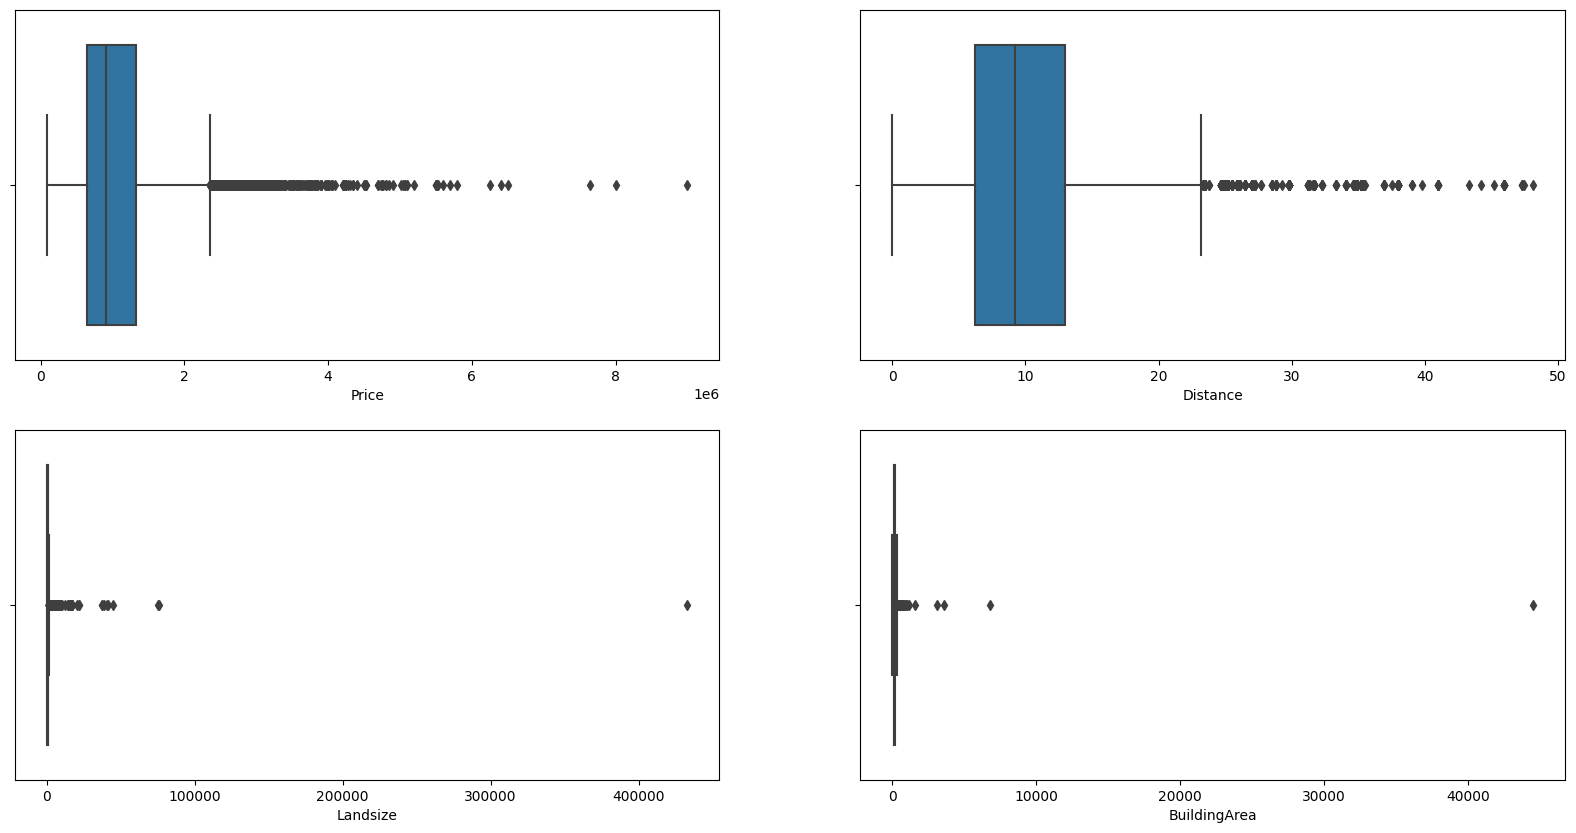

In [25]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.boxplot(df, x='Price')
plt.subplot(2,2,2)
sns.boxplot(df, x='Distance')
plt.subplot(2,2,3)
sns.boxplot(df, x='Landsize')
plt.subplot(2,2,4)
sns.boxplot(df, x='BuildingArea')
plt.show()

In [28]:
df = df[~((df['Landsize']>100000)|(df['BuildingArea']>10000))]

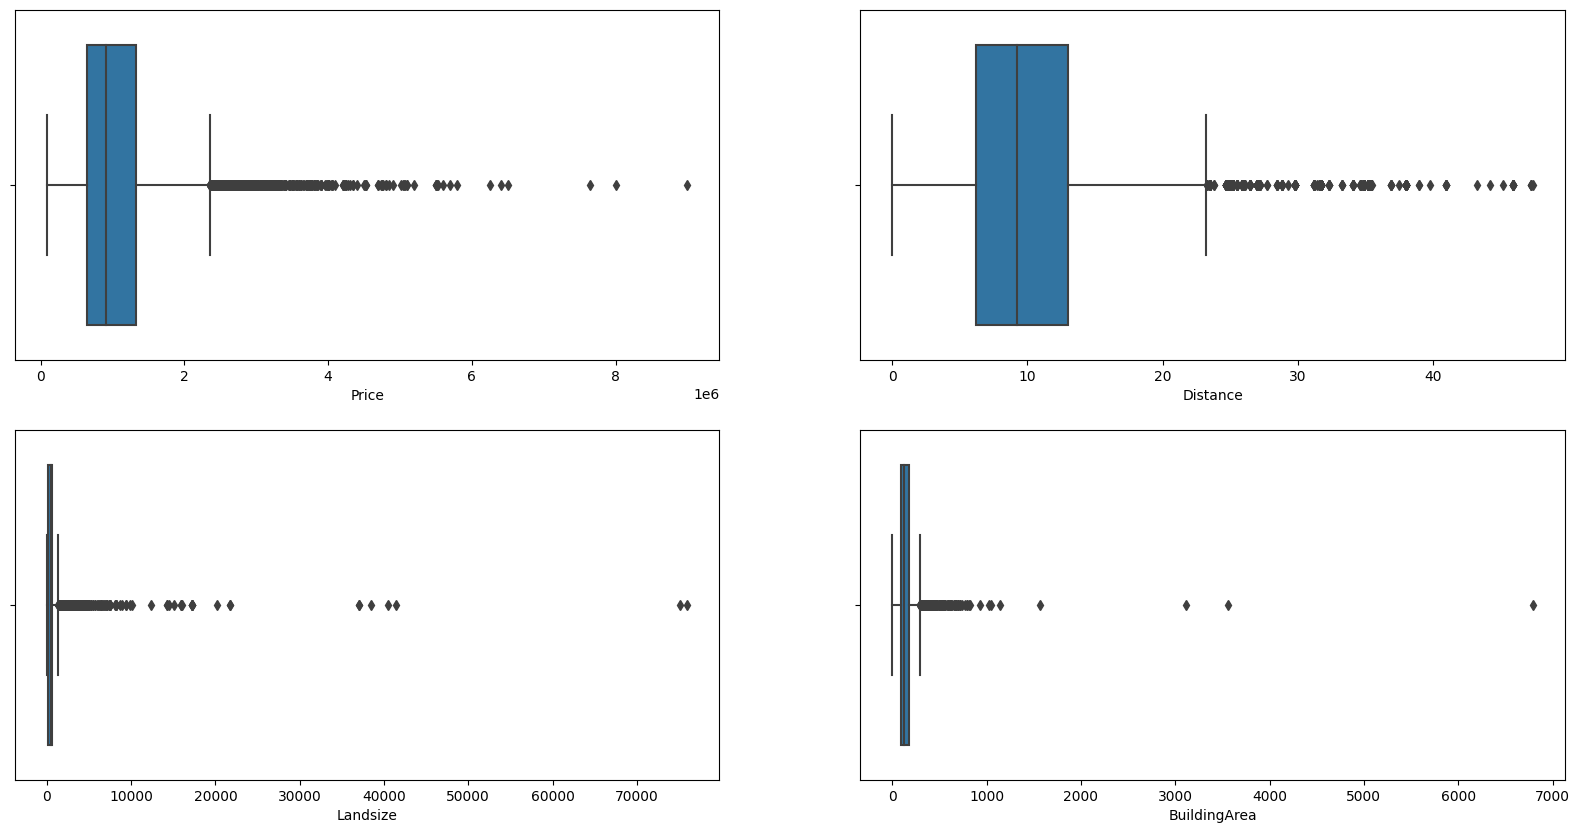

In [29]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.boxplot(df, x='Price')
plt.subplot(2,2,2)
sns.boxplot(df, x='Distance')
plt.subplot(2,2,3)
sns.boxplot(df, x='Landsize')
plt.subplot(2,2,4)
sns.boxplot(df, x='BuildingArea')
plt.show()

In [30]:
df = df[~((df['Landsize']>30000)|(df['BuildingArea']>3000))]

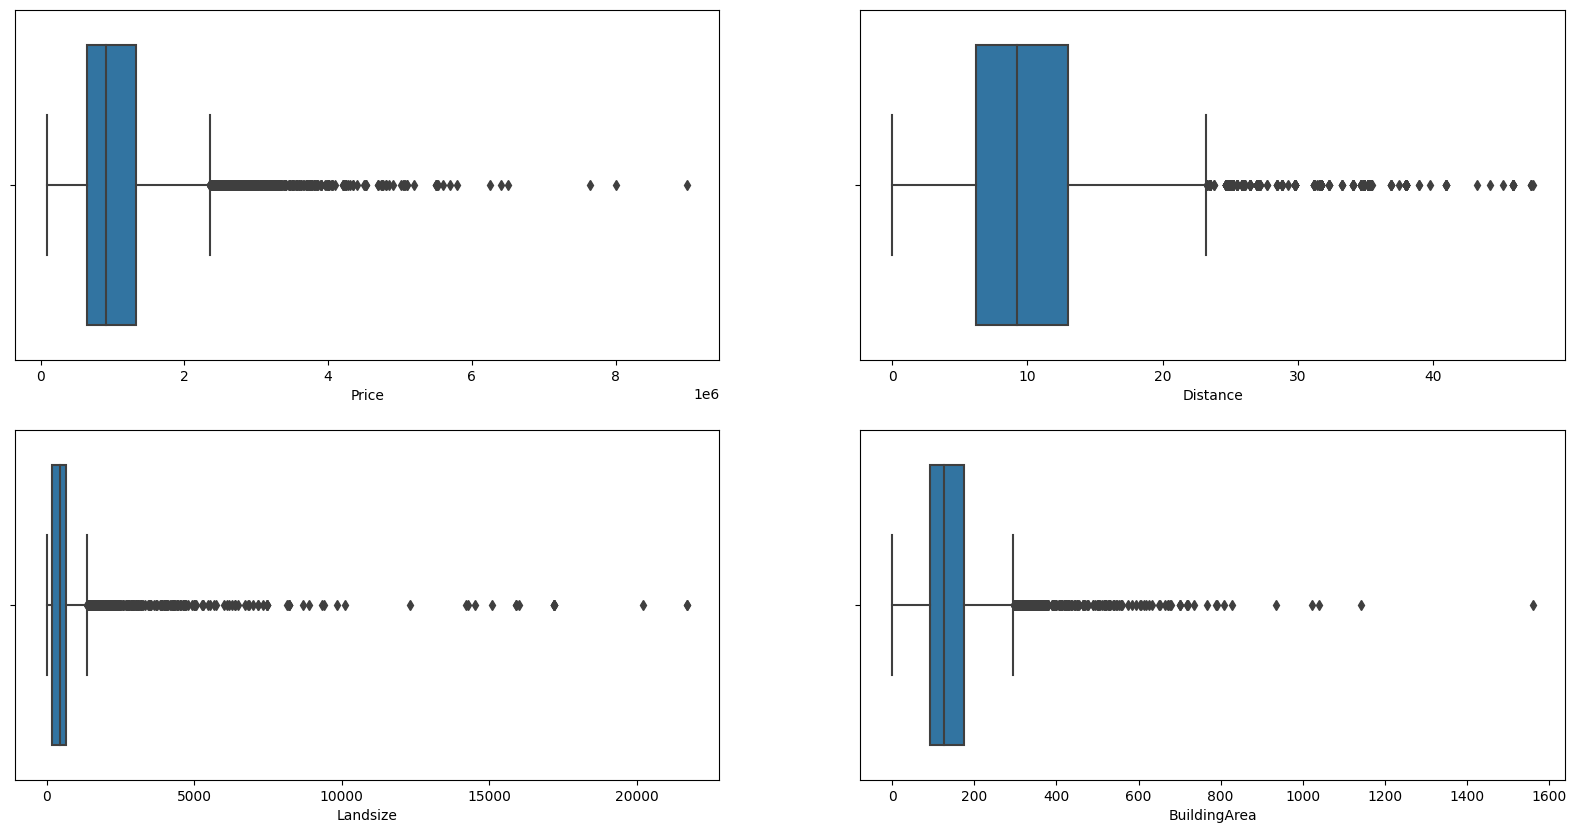

In [31]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.boxplot(df, x='Price')
plt.subplot(2,2,2)
sns.boxplot(df, x='Distance')
plt.subplot(2,2,3)
sns.boxplot(df, x='Landsize')
plt.subplot(2,2,4)
sns.boxplot(df, x='BuildingArea')
plt.show()

In [32]:
df = df[~((df['Landsize']>10000)|(df['BuildingArea']>900))]

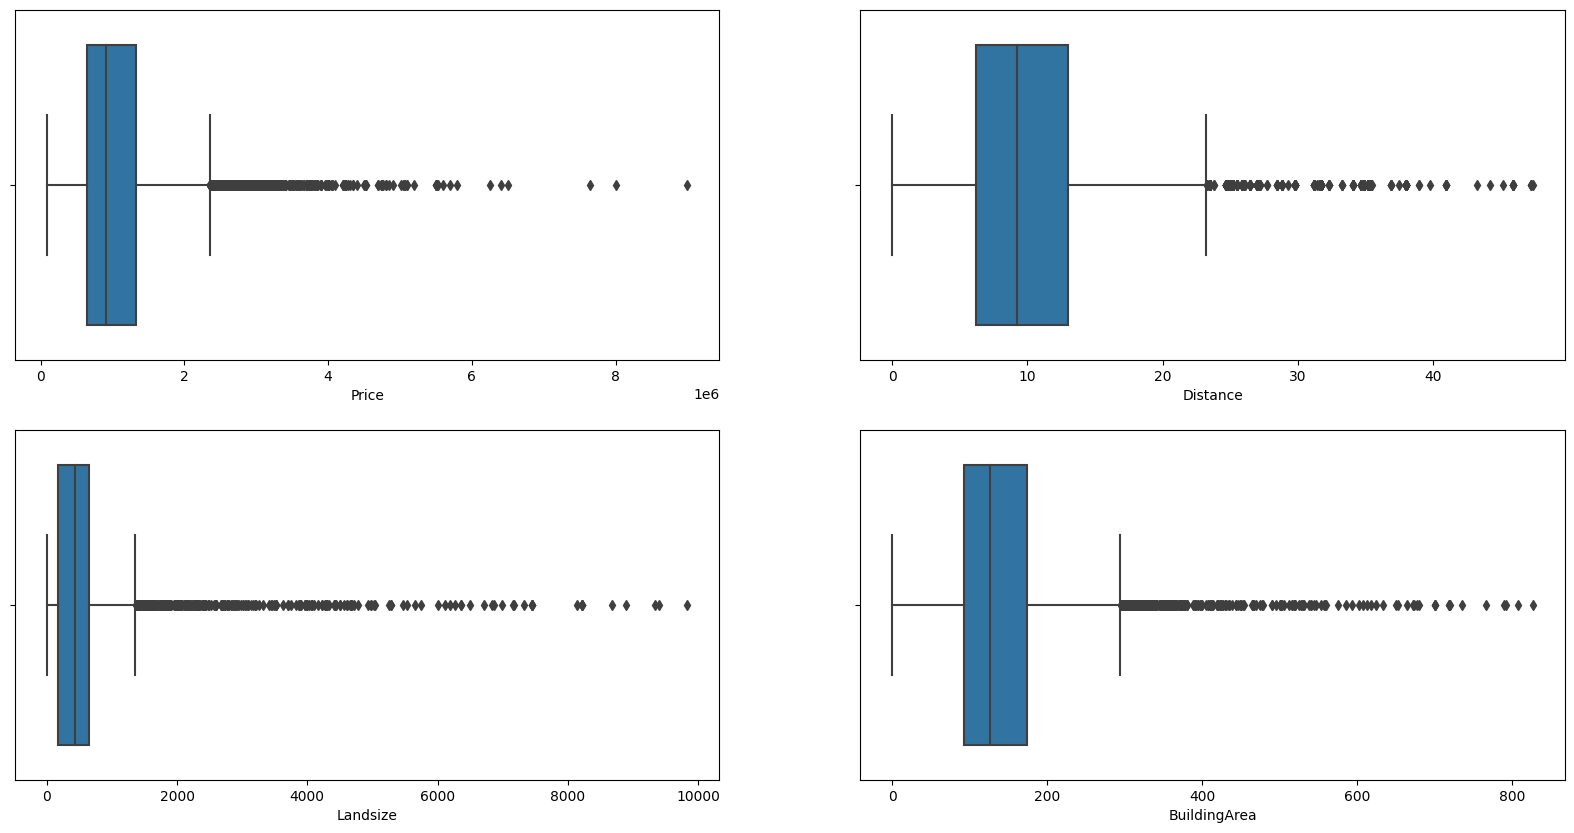

In [33]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.boxplot(df, x='Price')
plt.subplot(2,2,2)
sns.boxplot(df, x='Distance')
plt.subplot(2,2,3)
sns.boxplot(df, x='Landsize')
plt.subplot(2,2,4)
sns.boxplot(df, x='BuildingArea')
plt.show()

In [36]:
df['Bedroom2'].value_counts()

Bedroom2
3.0     5881
2.0     3712
4.0     2591
1.0      689
5.0      554
6.0       63
0.0       16
7.0       10
8.0        5
9.0        3
20.0       1
10.0       1
Name: count, dtype: int64

In [38]:
df = df[~(df['Bedroom2']>10)]

# EDA

In [40]:
Y = df['Price']
X = df.drop(columns=['Price'])

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2020)

In [43]:
X_train.head()

,Suburb,Rooms,Type,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname
11248,West Footscray,4,h,S,6.4,4.0,2.0,1.0,323.0,130.0,1945.0,Maribyrnong,Western Metropolitan
12796,Mount Waverley,4,h,S,14.2,4.0,2.0,2.0,695.0,160.0,1970.0,NaN,Eastern Metropolitan
306,Ascot Vale,4,h,SP,5.9,4.0,1.0,1.0,300.0,185.0,1890.0,Moonee Valley,Western Metropolitan
11446,Mount Waverley,5,h,S,14.2,5.0,5.0,2.0,729.0,398.0,2016.0,Monash,Eastern Metropolitan
11350,Essendon,2,u,SP,7.5,2.0,1.0,1.0,0.0,62.0,1980.0,Moonee Valley,Western Metropolitan


In [50]:
df.isna().sum()[df.isna().sum()>0]

Car               62
BuildingArea    6428
YearBuilt       5357
CouncilArea     1363
dtype: int64

In [51]:
pipe_iter_robust = Pipeline([('iter_imp',IterativeImputer()), ('robust', RobustScaler())])
pipe_mode_onehot = Pipeline([('mode',SimpleImputer(strategy='most_frequent')), ('onehot',OneHotEncoder())])
pipe_mode_binary = Pipeline([('mode',SimpleImputer(strategy='most_frequent')), ('binary',BinaryEncoder())])


transformer = ColumnTransformer([('pipe_iter_robust',pipe_iter_robust,['Rooms','Distance', 'Bedroom2', 'Bathroom','Car', 'Landsize', 'BuildingArea', 'YearBuilt']),
                  ('pipe_mode_onehot',pipe_mode_onehot,['Type','Method']),
                  ('pipe_mode_binary',pipe_mode_binary,['Suburb','CouncilArea','Regionname'])
                  ], remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipe_iter_robust',
                                 Pipeline(steps=[('iter_imp',
                                                  IterativeImputer()),
                                                 ('robust', RobustScaler())]),
                                 ['Rooms', 'Distance', 'Bedroom2', 'Bathroom',
                                  'Car', 'Landsize', 'BuildingArea',
                                  'YearBuilt']),
                                ('pipe_mode_onehot',
                                 Pipeline(steps=[('mode',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot', OneHotEncoder())]),
                                 ['Type', 'Method']),
                                ('pipe_mode_binary',
                                 Pipeline(steps=[('mode',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('binary', BinaryEncoder())]),
                                 ['Suburb', 'CouncilArea', 'Regionname'])])

In [52]:
transformer.fit(X_train)

X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [53]:
pipe1 = list(transformer.transformers_[0][1].get_feature_names_out())
pipe1

['Rooms',
 'Distance',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt']

In [54]:
pipe2 = list(transformer.transformers_[1][1].get_feature_names_out())
pipe2

['Type_h',
 'Type_t',
 'Type_u',
 'Method_PI',
 'Method_S',
 'Method_SA',
 'Method_SP',
 'Method_VB']

In [55]:
pipe3 = list(transformer.transformers_[2][1].get_feature_names_out())
pipe3

['0_0',
 '0_1',
 '0_2',
 '0_3',
 '0_4',
 '0_5',
 '0_6',
 '0_7',
 '0_8',
 '1_0',
 '1_1',
 '1_2',
 '1_3',
 '1_4',
 '1_5',
 '2_0',
 '2_1',
 '2_2',
 '2_3']

In [56]:
feature_columns = pipe1+pipe2+pipe3
feature_columns

['Rooms',
 'Distance',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Type_h',
 'Type_t',
 'Type_u',
 'Method_PI',
 'Method_S',
 'Method_SA',
 'Method_SP',
 'Method_VB',
 '0_0',
 '0_1',
 '0_2',
 '0_3',
 '0_4',
 '0_5',
 '0_6',
 '0_7',
 '0_8',
 '1_0',
 '1_1',
 '1_2',
 '1_3',
 '1_4',
 '1_5',
 '2_0',
 '2_1',
 '2_2',
 '2_3']

In [57]:
X_train = pd.DataFrame(data= X_train, columns=feature_columns)
X_test = pd.DataFrame(data= X_test, columns=feature_columns)

In [59]:
Y.isna().sum()

0

# Lasso

c:\Users\Vincent\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.310e+14, tolerance: 4.386e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\Vincent\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.310e+14, tolerance: 4.386e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\Vincent\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check t

        Alpha     RMSE_Train      RMSE_Test
0      0.0001  393925.961704  392126.769554
1      0.0010  393925.961704  392126.769856
2      0.0100  393925.961704  392126.772866
3      0.1000  393925.961742  392126.803021
4      1.0000  393925.965490  392127.043694
5     10.0000  393926.336539  392129.706707
6    100.0000  393963.246789  392209.867729
7   1000.0000  395087.010304  393310.765616
8  10000.0000  409051.379436  405410.821999


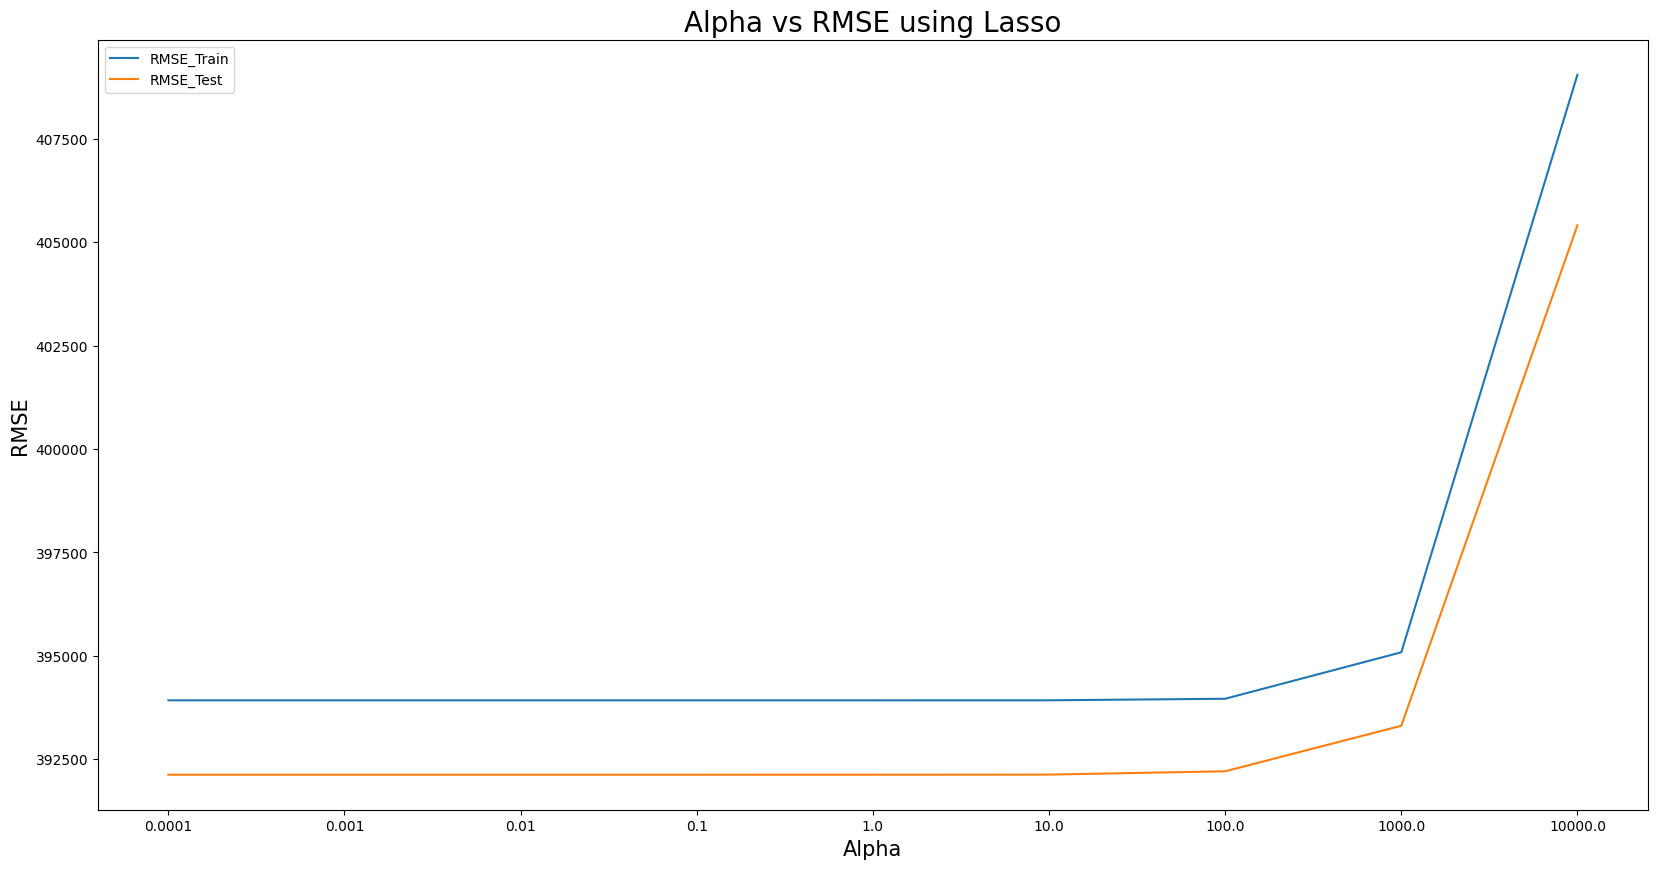

In [61]:
l_alpha = np.logspace(-4,4,9)
df_rmse = pd.DataFrame(columns=['Alpha', 'RMSE_Train','RMSE_Test'])
for i in l_alpha:
    model = Lasso(alpha=i)
    model.fit(X_train,Y_train)
    Y_train_predict = model.predict(X_train)
    Y_test_predict = model.predict(X_test) 
    df_rmse.loc[len(df_rmse)] = {'Alpha': i, 'RMSE_Train': mean_squared_error(Y_train, Y_train_predict)**(0.5), 'RMSE_Test': mean_squared_error(Y_test, Y_test_predict)**(0.5)}

print(df_rmse)
plt.figure(figsize=(20,10))
sns.lineplot(data=df_rmse, x=range(len(df_rmse)), y='RMSE_Train', label='RMSE_Train')
sns.lineplot(data=df_rmse, x=range(len(df_rmse)), y='RMSE_Test', label='RMSE_Test')
plt.xticks(ticks=range(len(df_rmse)),labels=df_rmse['Alpha'], fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Alpha', fontsize=15)
plt.ylabel('RMSE', fontsize=15)
plt.title('Alpha vs RMSE using Lasso', fontsize=20)
plt.show()

Model tidak overfitting (RMSE Train > RMSE Test), alpha yang baik dipakai yakni 10e-4 s.d. 10e2